C:\Users\pmall\AppData\Local\Temp\ipykernel_27944\469692722.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vote_counts = data.groupby('vote_bins').size().reset_index(name='review_count')


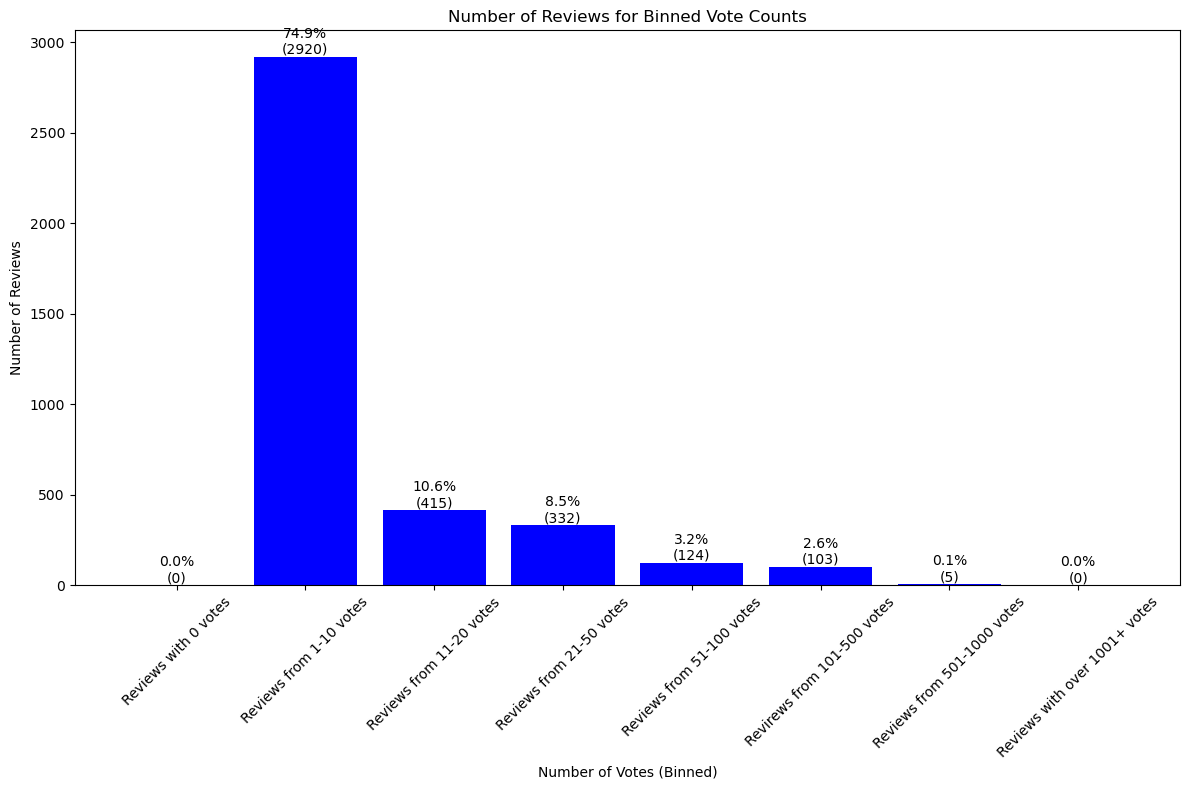

In [1]:
#  Number of reviews per vote counts - Use this

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your JSON file
data = pd.read_json('C:/USD/ms-aai-501-final-project/data/Software_5-core.json', lines=True)

# Convert the 'vote' column to numeric, handling non-numeric values
data['vote'] = pd.to_numeric(data['vote'], errors='coerce')
data.dropna(subset=['vote'], inplace=True)

# Cast votes to integer
data['vote'] = data['vote'].astype(int)

# Define the bins for vote counts
bins = [-1, 0, 10, 20, 50, 100, 500, 1000, np.inf]  # Adjust the bins as needed
labels = ['Reviews with 0 votes', 'Reviews from 1-10 votes', 'Reviews from 11-20 votes', 'Reviews from 21-50 votes', 'Reviews from 51-100 votes', 'Revirews from 101-500 votes', 'Reviews from 501-1000 votes', 'Reviews with over 1001+ votes']

# Bin the vote counts using pd.cut
data['vote_bins'] = pd.cut(data['vote'], bins=bins, labels=labels)

# Group by the binned vote counts and get the number of reviews for each bin
vote_counts = data.groupby('vote_bins').size().reset_index(name='review_count')

# Calculate total number of reviews
total_reviews = vote_counts['review_count'].sum()

# Plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
bars = plt.bar(vote_counts['vote_bins'].astype(str), vote_counts['review_count'], color='blue')

plt.xlabel('Number of Votes (Binned)')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews for Binned Vote Counts')
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Annotate each bar with percentage and review count
for bar in bars:
    yval = bar.get_height()
    percentage = f'{100 * yval / total_reviews:.1f}%'
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage}\n({yval})', ha='center', va='bottom')

# Improve layout to prevent label cutoff
plt.tight_layout()

plt.show()